In [112]:
import pandas as pd
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,'..')
from src.data.etl import *
from src.model.train_model import *
from src.analysis.analysis import *

# Epidemiology Model 


# Data 
- 1. COVID-19 US cases: Directly read data from JHU github repo.
- 2. Mobility Data provided by Apple for each county in the U.S.


In [93]:
us_confirmed_df,us_death_df,global_recover_df,mobility = retrieve_data()
display(us_confirmed_df.head())
display(us_death_df.head())
display(global_recover_df.head())
display(mobility.head())

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,2818,2873,2893,2945,2979,3005,3043,3087,3117,3186
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,9051,9163,9341,9501,9626,9728,9821,9974,10087,10288
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1189,1206,1214,1217,1219,1223,1224,1240,1245,1258
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,1204,1239,1252,1270,1283,1293,1299,1317,1322,1359
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,3061,3100,3158,3231,3281,3299,3324,3426,3496,3600


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,42,42,42,42,42,42,42,42,42,42
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,137,137,137,138,138,138,138,141,141,141
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,11,29,29,29,29,29,29,30,30,30
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,18,38,38,38,38,38,39,39,39,40
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,40,43,45,46,46,46,46,46,47,47


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36946,37218,37260,37260,37393,37685,37879,37920,38032,38099
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,19384,19912,20484,20974,21286,21617,22180,22527,23072,23609
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,54405,54990,55538,56079,56617,57146,57648,58146,58146,59135
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,5940,5988,6066,6130,6171,6238,6293,6367,6452,6505
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,7932,8139,8244,8299,8335,8338,8353,8470,8579,8679


,country_code,admin_level,admin1,admin2,fips,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,...,2020-11-30,2020-12-01,2020-12-02,2020-12-03,2020-12-04,2020-12-05,2020-12-06,2020-12-07,2020-12-08,2020-12-09
0,US,1,Alabama,NaN,1.0,8.331,10.398,10.538,10.144,10.982,...,8.351,9.509,9.640,10.284,10.647,9.140,6.831,8.801,10.229,9.195
1,US,2,Alabama,Autauga County,1001.0,7.194,14.587,13.865,13.880,14.659,...,9.436,12.719,11.212,12.898,13.569,9.145,5.962,10.742,13.429,12.430
2,US,2,Alabama,Baldwin County,1003.0,9.780,12.042,11.481,10.879,12.381,...,9.038,9.898,9.888,10.128,10.967,9.482,7.307,9.089,10.487,9.542
3,US,2,Alabama,Barbour County,1005.0,8.348,10.004,9.267,6.517,8.247,...,7.758,9.696,8.324,9.774,8.924,8.462,7.540,8.888,9.557,8.469
4,US,2,Alabama,Bibb County,1007.0,13.008,23.076,24.164,22.768,26.944,...,13.373,15.405,15.750,18.180,19.944,14.295,10.838,14.730,18.905,14.855


In [94]:
df_list = us_confirmed_df,us_death_df,global_recover_df,mobility

In [97]:
# Getting the Susceptible, Infected, Removed, and Population of US from 30 - 70 days into the pandemic
get_country(30,40,df_list)


(array([332865671, 332865671, 332865671, 332865671, 332865671, 332865671,
        332865670, 332865670, 332865662, 332865655, 332865632, 332865613,
        332865580, 332865503, 332865450, 332865284, 332865168, 332865093,
        332864910, 332864537, 332864133, 332863571, 332862804, 332862457,
        332861006, 332859167, 332856512, 332852521, 332846735, 332840254,
        332831566, 332820683, 332810066, 332798351, 332781931, 332763443,
        332744382, 332726361, 332705522, 332678896]),
 array([    16,     16,     16,     16,     16,     16,     17,     17,
            25,     32,     55,     74,    107,    184,    237,    403,
           519,    594,    777,   1150,   1554,   2116,   2883,   3230,
          4681,   6520,   9175,  13166,  18952,  25433,  34121,  45004,
         55621,  67336,  83756, 102244, 121305, 139326, 160165, 186791]),
 array([    5,     5,     5,     5,     6,     6,     6,     7,     8,
            8,    13,    14,    18,    19,    21,    24,    28,    29

# Key variables of Epidemiology Model
- I, the number of infected, is in the `us_comfirmed`
- S, susceptible to COVID-19, is in `us_population` - `us_confirmed`, denoted as `us_susceptible`
- R, removed, is the sum of recovered and deceased. 
- N, population

## Parameters
- Beta: the infection rate
- D: number of days a patient can stay infected

## Goal
- With existing knowledge of I,S,R,and N, use gradient descent to figure out $\theta$ = ($\beta$, D)

# Methods
## Gradient Descent to solve for $\beta$ and $\frac{1}{D}$

Given: 
$\begin{align*}
  &\xi = \frac{1}{D} \\
  &f_s(I_n,N,S_n) = -\beta\left(\frac{I_n}{N}\right) S_n, \\
  &f_I(I_n,N,S_n) = - I\xi + \beta\left(\frac{I_n}{N}\right) S_n,  \\
  &f_R(I_n) = I_n\xi, \\
  &h=1
\end{align*}
$

Plug the above values into
$\frac{1}{N} \sum_{n=1}^N \nabla_{\theta} \left( \left({\frac{s(n+1)-s(n)}{h} - f_s(s(n), I(n), R(n);\theta)}\right)^2
+ \left({\frac{I(n+1)-I(n)}{h} - f_I(s(n), I(n), R(n;\theta)}\right)^2 + \dots \right)$

To calculate the above the term, we need to use __chain rule__ to differentiate with respect to $\beta$ and $\xi$

$\nabla_{\beta} = 2 \cdot \left(\frac{S_{n+1} - S_{n}}{h} - \left(-\beta S_n  \frac{I_n}{N}\right) \right) \cdot \left(S_n \cdot \frac{I_n}{N}\right) + 2 \cdot \left(\frac{I_{n+1} - I_{n}}{h}  - \left( -\xi_k I_n + \beta_k \frac{I_n}{N} S_n \right)\right) \cdot \left( -S_n \cdot \frac{I_n}{N}\right)$

$\nabla_{\xi} = 2 \cdot \left(\frac{I_{n+1} - I_{n}}{h}  + \left(I_n\xi_k - \beta_k \frac{I_n}{N}S_n\right) \right) \cdot \left(I_n\right) + 2 \cdot \left(\frac{R_{n+1} - R_{n}}{h} - I_n\xi_k\right) \cdot \left( -I_n\right)$



## Tuning
First initialize $\theta$ at $\beta = 0.2 $ and $\xi = 0.1$


Then, at each iteration update $\beta$ and $\xi$ according to the rules below


$\beta_{k+1} = \beta_k - h_G \partial_\beta L(\theta|s(1),\dots,s(N)),$


$
\xi_{k+1} = \xi_k - h_G \partial_\xi L(\theta|s(1),\dots,s(N)).$
 where $h_G = 0.001$
 


 ## Tuning learning rate
 $\nabla_{\beta} = 2 \cdot \left(\frac{S_{n+1} - S_{n}}{h} - \left(-\beta_{k} S_n  \frac{I_n}{N}\right) \right) \cdot \left(S_n \cdot \frac{I_n}{N}\right) + 2 \cdot \left(\frac{I_{n+1} - I_{n}}{h}  - \left( -\xi_k I_n + \beta_k \frac{I_n}{N} S_n \right)\right) \cdot \left( -S_n \cdot \frac{I_n}{N}\right)$

$\nabla_{\xi} = 2 \cdot \left(\frac{I_{n+1} - I_{n}}{h}  + \left(I_n\xi_k - \beta_k \frac{I_n}{N}S_n\right) \right) \cdot \left(I_n\right) + 2 \cdot \left(\frac{R_{n+1} - R_{n}}{h} - I_n\xi_k\right) \cdot \left( -I_n\right)$


 The Hessian matrix will look like the following:
$ \begin{bmatrix}
 \frac{\partial \nabla_{\beta}}{\partial \beta} &  \frac{\partial \nabla_{\xi}}{\partial_{\beta}}\\
\frac{\partial \nabla_{\beta}}{\partial_{\xi}} & \frac{\partial \nabla_{\xi}}{\partial \xi}
\end{bmatrix}$

We can calculate the hessian matrix given s,i arrays and population 

 $
 \begin{aligned}
 \frac{\partial \nabla_{\beta}}{\partial \beta} &= \frac{1}{N} \sum_{n=1}^N \left(2\cdot \left(S_{n}\cdot \frac{I_{n}}{N}\right)^2 + 2\cdot \left(S_{n} \cdot \frac{I_{n}}{N}\right) ^2\right) \\
 &= \frac{1}{N} \sum_{n=1}^N \left(4\cdot \left(S_{n}\cdot \frac{I_{n}}{N}\right)^2\right) 
  \end{aligned}$
 
  $\begin{aligned}
  \frac{\partial \nabla_{\xi}}{\partial \xi} &= \frac{1}{N} \sum_{n=1}^N \left(2\cdot I_{n} ^2 + 2\cdot I_{n} ^2\right) \\
  &= \frac{1}{N} \sum_{n=1}^N  4\cdot I_{n} ^2
  \end{aligned}$
  
   $
 \begin{aligned}
 \frac{\partial \nabla_{\xi}}{\partial_{\beta}} &=  \frac{1}{N} \sum_{n=1}^N -2 \cdot S_{n}\cdot \frac{I_{n}^2}{N} \\
 & = \frac{\partial \nabla_{\beta}}{\partial_{\xi}}
  \end{aligned}$
  
  

  
We then use numpy.lin.eg to get the eigen value of the hessian matrix

In [143]:

s,i,r,p = get_country(30,40,df_list)
learning_rate = tune_learning_rate(s,i,r,p)
print(learning_rate) #Calculate the learning rate from hessian matrix

1.117738012402961e-11


../src/model/train_model.py:44: RuntimeWarning: overflow encountered in long_scalars
  result_both_second += -2*s[n]*i[n]**2/population


In [144]:
calculate(s,i,r,p,learning_rate,p) #Outputs the Beta, and D

(0.18336467723495473, 101.36311086550481)

0.18336467723495473 101.36311086550481


'us.png'

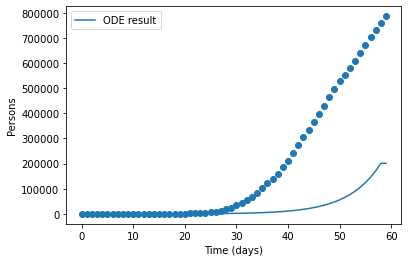

In [145]:
beta,d = calculate(s,i,r,p,learning_rate,p)
s,i,r,p = get_country(30,60,df_list)

print(beta,d)
length = 60 #predicting 20 more days 
draw_ODE_from_data("us.png",s,i,r,p,beta,d,length,int_steps=1)

0.17522671120713582 399.8722628878253


'california.png'

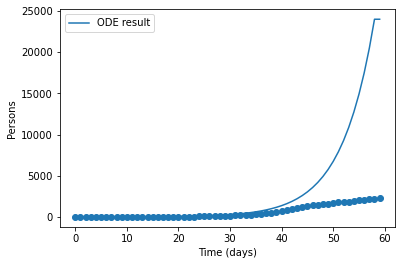

In [142]:
s,i,r,p = get_state(30,40,df_list,"California")
learning_rate = tune_learning_rate(s,i,r,p)
beta,d = calculate(s,i,r,p,learning_rate,p)

s,i,r,p = get_county(30,60,df_list,county_code)

print(beta,d)
length = 60 #predicting 20 more days 
draw_ODE_from_data("california.png",s,i,r,p,beta,d,length,int_steps=1)

In [ ]:
s,i,r,p = get_state(30,40,df_list,"California")
learning_rate = tune_learning_rate(s,i,r,p)
beta,d = calculate(s,i,r,p,learning_rate,p)
print(beta,d)
length = 60 #predicting 20 more days 
draw_ODE_from_data("california.png",s,i,r,p,beta,d,length,int_steps=1)

0.1522507750708867 797.6176130395337


'sd.png'

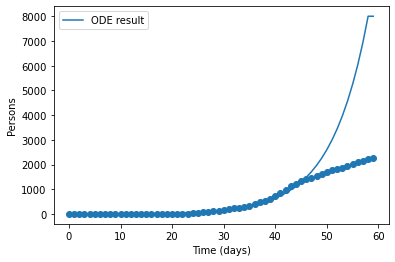

In [141]:
county_code = 6073 #San Diego county
s,i,r,p = get_county(30,40,df_list,county_code)
learning_rate = tune_learning_rate(s,i,r,p)
beta,d = calculate(s,i,r,p,learning_rate,p)

s,i,r,p = get_county(30,60,df_list,county_code)

print(beta,d)
length = 60 #predicting 20 more days 
draw_ODE_from_data("sd.png",s,i,r,p,beta,d,length,int_steps=1)

# Result & Discussion
From the graphs we plotted before, we can see that the model doesn't predict very well. Especially in the US case, the model underestimates the case numbers. For california and sd county, the model over predicts the case numbers.
Above is the replication. We will add another layer to the model, the mobility data (a measure of activities in different regions)